# <center> Variational POVM Classifier for Iris Data </center>


In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import qutip
from scipy.linalg import sqrtm, expm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from povm_clf import *

## 1. Iris Data 

In [2]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 1-1. Scikit-learn

#### DESCR

In [5]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### DATA FRAME

In [6]:
iris_df=pd.DataFrame(data=iris_data.data,columns = iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### DATA PLOT

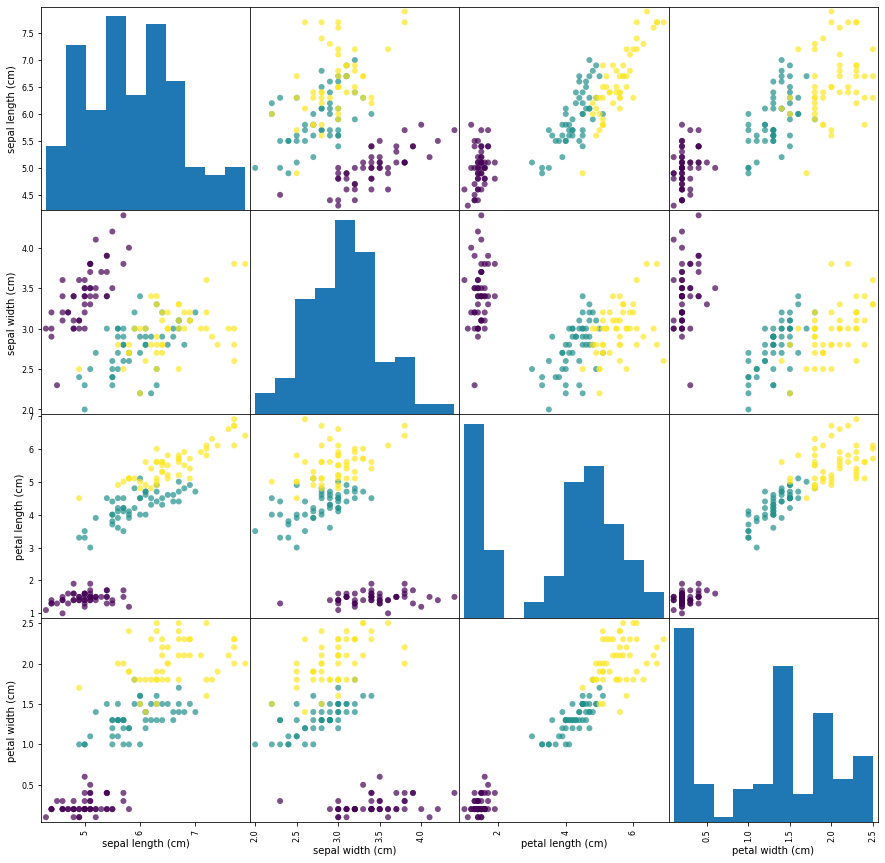

In [7]:
pd.plotting.scatter_matrix(iris_df,
                            figsize=(15,15),
                            marker = 'o' ,#마커 사이즈 
                            c = iris_data.target, #컬러를 종류(라벨)에 따라 나눔
                            alpha = 0.7 #투명도 (0 ~최대 1 )
                            )
plt.show()

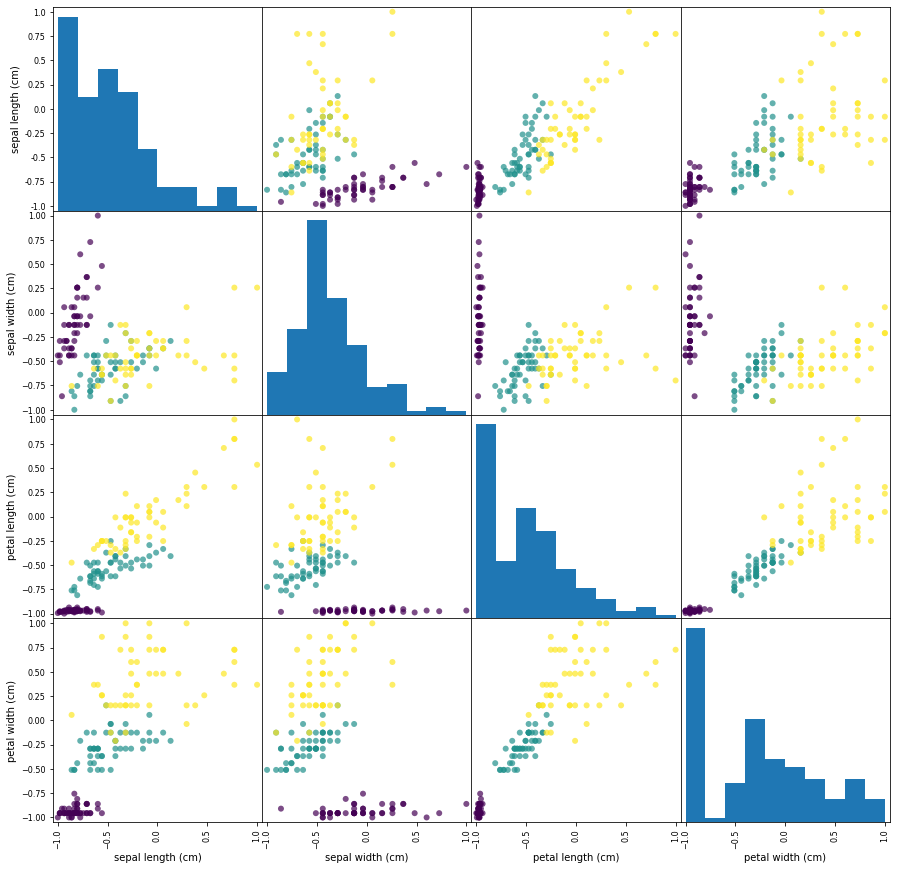

In [8]:
# Preprocessing Data

X = iris_data.data
y = iris_data.target

X = np.exp(X/2)
X = affine_preprocessing(X)
#X = X / np.linalg.norm(X, axis=1)[:,np.newaxis]

iris_df=pd.DataFrame(data=X,columns = iris_data.feature_names)

pd.plotting.scatter_matrix(iris_df,
                            figsize=(15,15),
                            marker = 'o' ,#마커 사이즈 
                            c = iris_data.target, #컬러를 종류(라벨)에 따라 나눔
                            alpha = 0.7 #투명도 (0 ~최대 1 )
                            )
plt.show()

#### DATA SPLITING

In [6]:
X = iris_data.data
#X = iris_df
y = iris_data.target # Answer!

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    #stratify=,
                                                    random_state=35) #50

#### DATA PREPROCESSING

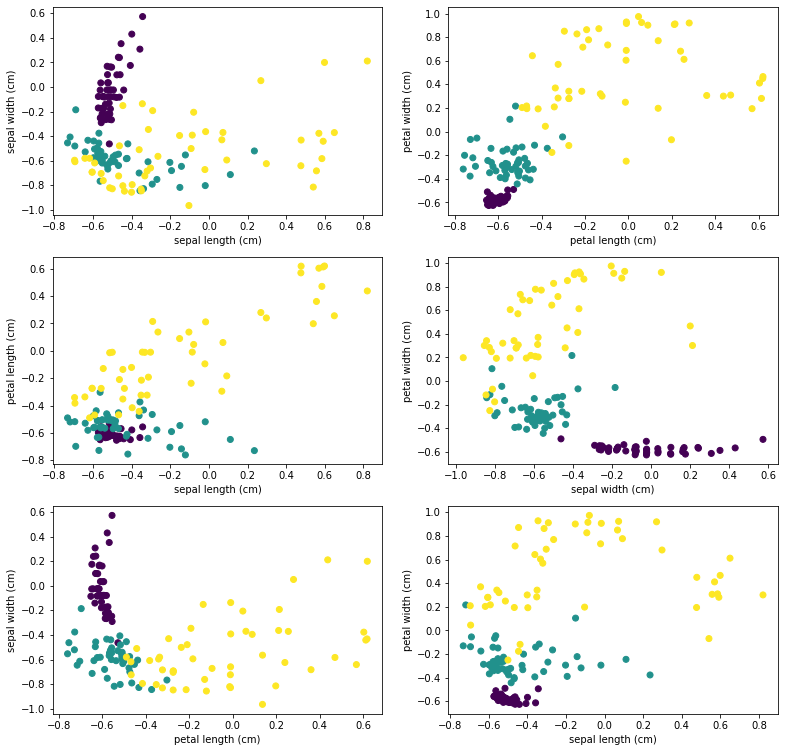

In [9]:
X = iris_data.data
y = iris_data.target

X = np.exp(X/2)
X = affine_preprocessing(X)
X = X / np.linalg.norm(X, axis=1)[:,np.newaxis]
plot_iris_data(X)

In [8]:
def plot_iris_data(X, y=y):
    plt.figure(figsize=(13,13))
    plt.subplot(3,2,1)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[1])
    plt.subplot(3,2,2)
    plt.scatter(X[:,2], X[:,3], c=y)
    plt.xlabel(iris_data.feature_names[2])
    plt.ylabel(iris_data.feature_names[3])
    plt.subplot(3,2,3)
    plt.scatter(X[:,0], X[:,2], c=y)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[2])
    plt.subplot(3,2,4)
    plt.scatter(X[:,1], X[:,3], c=y)
    plt.xlabel(iris_data.feature_names[1])
    plt.ylabel(iris_data.feature_names[3])
    plt.subplot(3,2,5)
    plt.scatter(X[:,2], X[:,1], c=y)
    plt.xlabel(iris_data.feature_names[2])
    plt.ylabel(iris_data.feature_names[1])
    plt.subplot(3,2,6)
    plt.scatter(X[:,0], X[:,3], c=y)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[3])
    plt.plot()

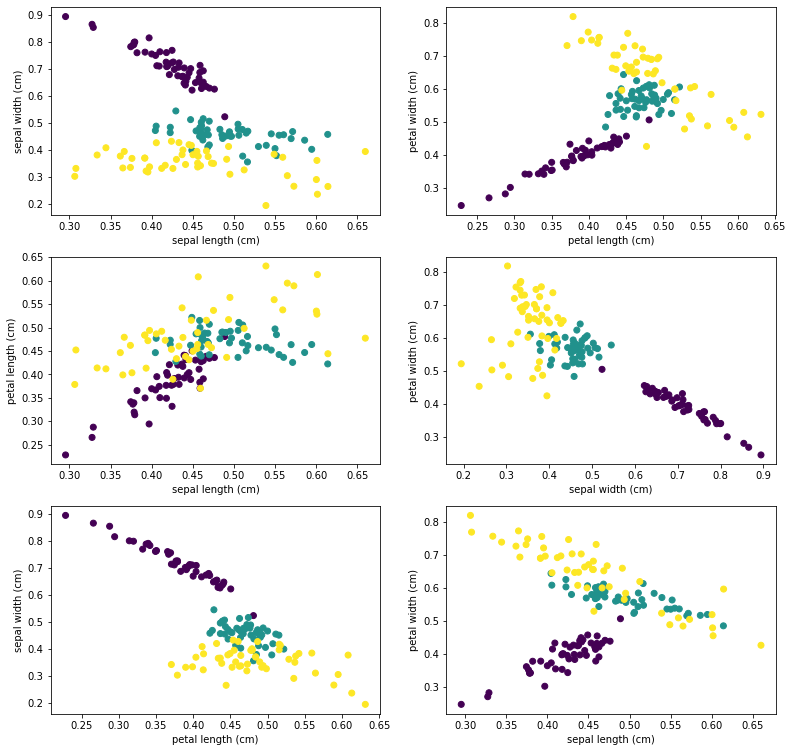

In [ ]:
plot_iris_data(X)

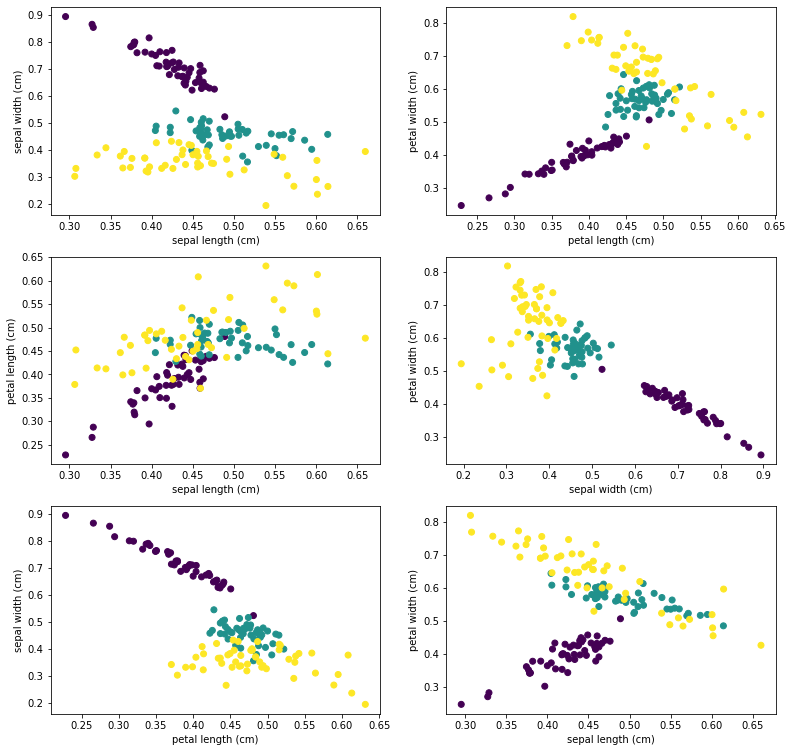

In [ ]:
#normalization
data = X / np.linalg.norm(X, axis=1)[:,np.newaxis]
plot_iris_data(data)

#1 [min, max] $\rightarrow$ [-1, +1]

In [ ]:
def affine_preprocessing(data):
    # input: list of data
    maxvals, minvals = np.max(data, axis=0), np.min(data, axis=0)
    slopes = 2 / (maxvals-minvals)
    maxvals, minvals = maxvals * slopes, minvals * slopes
    intercepts = np.median([maxvals, minvals], axis=0)
    return data * slopes - intercepts

#data = affine_preprocessing(X)
#plot_iris_data(data)

#normalization
#data = data / np.linalg.norm(data, axis=1)[:,np.newaxis]
#plot_iris_data(data)

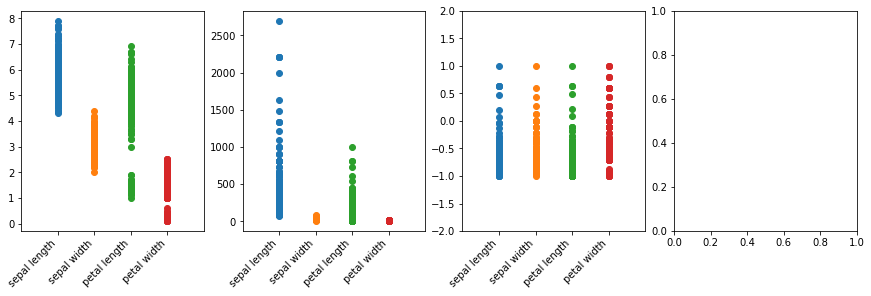

In [ ]:
X = load_iris().data

fig, axs = plt.subplots(1, 4, constrained_layout=True, figsize=(12, 4))

#Original Data
for i in range(4):
    axs[0].scatter([0.5*i+0.5]*len(X[:,i]), X[:,i])

axs[0].set_xlim([0,2.5])
axs[0].set_xticks([0.5*i+0.5 for i in range(4)])
axs[0].set_xticklabels(['sepal length','sepal width','petal length','petal width'], rotation = 45, ha="right")

# Exponential Data
X = np.exp(X)
for i in range(4):
    axs[1].scatter([0.5*i+0.5]*len(X[:,i]), X[:,i])

axs[1].set_xlim([0,2.5])
axs[1].set_xticks([0.5*i+0.5 for i in range(4)])
axs[1].set_xticklabels(['sepal length','sepal width','petal length','petal width'], rotation = 45, ha="right")

# Affine mapping
X = affine_preprocessing(X)
for i in range(4):
    axs[2].scatter([0.5*i+0.5]*len(X[:,i]), X[:,i])

axs[2].set_xlim([0,2.5])
axs[2].set_xticks([0.5*i+0.5 for i in range(4)])
axs[2].set_xticklabels(['sepal length','sepal width','petal length','petal width'], rotation = 45, ha="right")
axs[2].set_ylim([-2,2])

plt.show()

In [ ]:
X

tensor([[-0.93114597, -0.30527231, -0.99729794, -0.97901445],
        [-0.95381126, -0.65713826, -0.99729794, -0.97901445],
        [-0.97236803, -0.53704957, -0.9980779 , -0.97901445],
        [-0.98034404, -0.60009363, -0.99643596, -0.97901445],
        [-0.94304478, -0.21122162, -0.99729794, -0.97901445],
        [-0.88740082,  0.13454941, -0.9944305 , -0.93019003],
        [-0.98034404, -0.3903729 , -0.99729794, -0.95582184],
        [-0.94304478, -0.3903729 , -0.99643596, -0.97901445],
        [-0.99409123, -0.70875438, -0.99729794, -0.97901445],
        [-0.95381126, -0.60009363, -0.99643596, -1.        ],
        [-0.88740082, -0.10727952, -0.99643596, -0.97901445],
        [-0.96355318, -0.3903729 , -0.99548333, -0.97901445],
        [-0.96355318, -0.65713826, -0.99729794, -1.        ],
        [-1.        , -0.65713826, -0.9994222 , -1.        ],
        [-0.80438979,  0.27485656, -0.99878363, -0.97901445],
        [-0.82835104,  1.        , -0.99643596, -0.93019003],
        

#2 [min, max] $\rightarrow$ [0, +1]

In [ ]:
def pos_affine_preprocessing(data):
    # input: list of data
    maxvals, minvals = np.max(data, axis=0), np.min(data, axis=0)
    slopes = 1 / (maxvals-minvals)
    maxvals, minvals = maxvals * slopes, minvals * slopes
    #intercepts = np.median([maxvals, minvals], axis=0)
    return data * slopes - minvals#- intercepts

#data = pos_affine_preprocessing(X)
#plot_iris_data(data)

# Normalization
#data = data / np.linalg.norm(data, axis=1)[:,np.newaxis]
#plot_iris_data(data)

#4 Normalize

In [ ]:
def normalize_preprocessing(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

## 2. Quantum Data Encoding
[Templates in PENNYLANE](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

In [ ]:
c_data = X[0]
dev = qml.device('default.qubit', wires=[0,1])

`[a,b,c,d]` ==> $a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle$

### 2-1. Amplitude Encoding

In [ ]:
@qml.qnode(dev)
def q_data(f):
    qml.AmplitudeEmbedding(features=f, wires=range(2), normalize=True)
    #qml.PauliX(wires=0)
    #mes0(wires=[0,1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

input: [-0.93114597 -0.30527231 -0.99729794 -0.97901445]
normalization: [-0.54553853+0.j -0.17885252+0.j -0.58429555+0.j -0.57358365+0.j]


(<Figure size 288x216 with 1 Axes>, <Axes:>)

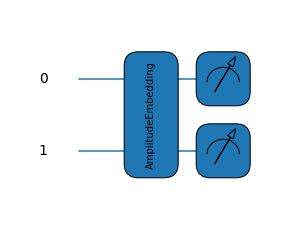

In [ ]:
print('input:', c_data)
q_data(c_data)
print('normalization:', dev.state)
qml.draw_mpl(q_data)(c_data)

### 2-2. Quantum Feature Map from Nat. Phys.

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def QuantumFeatureMap(features, wires):
    qml.RZ(features[0], wires=wires[0])
    qml.RZ(features[1], wires=wires[1])
    qml.CNOT(wires=[wires[0],wires[1]])
    qml.RZ(features[2], wires=wires[1])
    qml.CNOT(wires=[wires[0],wires[1]])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

(<Figure size 504x216 with 1 Axes>, <Axes:>)

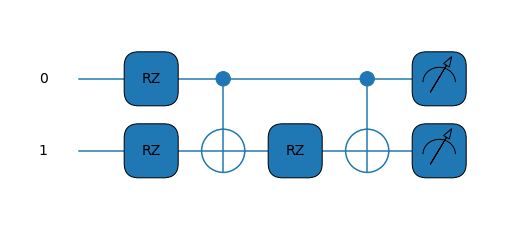

In [ ]:
c_data = [0.67, 0.12, 0.67*0.12]
qml.draw_mpl(QuantumFeatureMap)(c_data, [0,1])

### 2-3. Quantum Feature Map

$$
U_{\Phi(\vec{x})}= \exp[i\phi_0 XI + i\phi_{01} XX + i\phi_{1} IX + i\phi_{12} ZX + i\phi_{2} ZI + i\phi_{23} ZZ + i\phi_{3} IZ + i\phi_{30} XZ]
$$

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def quantum_feature(wires, features, layer=3):

    for _ in range(layer):
        #XI
        qml.RX(features[0,0], wires=wires[0])

        #XX
        qml.Hadamard(wires=wires[0])
        qml.Hadamard(wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.RZ(features[0,1], wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.Hadamard(wires=wires[0])
        qml.Hadamard(wires=wires[1])

        #IX
        qml.RX(features[1,1], wires=wires[1])

        #ZX
        qml.Hadamard(wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.RZ(features[1,2], wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.Hadamard(wires=wires[1])

        #ZI
        qml.RZ(features[2,2], wires=wires[0])

        #ZZ
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.RZ(features[2,3], wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])

        #IZ
        qml.RZ(features[3,3], wires=wires[1])

        #XZ
        qml.Hadamard(wires=wires[0])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.RZ(features[0,3], wires=wires[1])
        qml.CNOT(wires=[wires[0],wires[1]])
        qml.Hadamard(wires=wires[0])

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

(<Figure size 4536x216 with 1 Axes>, <Axes:>)

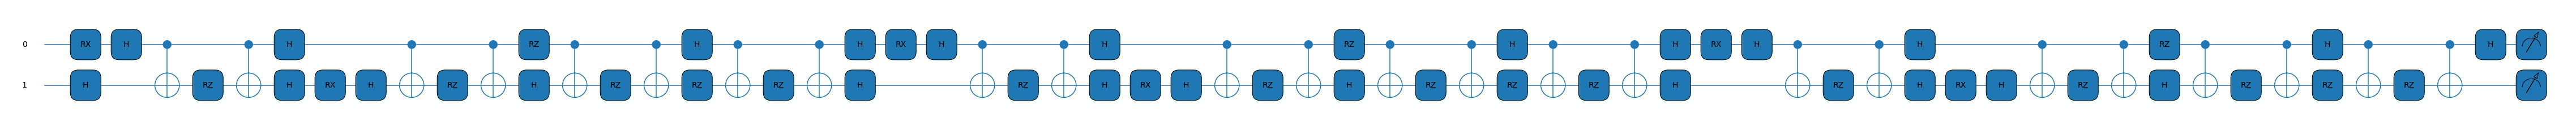

In [ ]:
c_data = [0.67, 0.12, 0.45, 0.05]
c_data = FeatureMap(c_data)
qml.draw_mpl(quantum_feature)([0,1], c_data)

Six Features

In [ ]:
def FeatureMap(x, types='mult'):
    phi = np.diag(x)
    for i in range(len(x)):
        for j in range(1+i, len(x)):
            if types == 'pidiffmult':
                phi[i,j] = (np.pi - x[i]) * (np.pi - x[j])
            elif types == 'mult':
                phi[i,j] = np.pi * x[i] * x[j]
            elif types == 'binflipmult':
                phi[i,j] = (np.pi/2) * (1-x[i]) * (1-x[j])
            elif types == 'gaussian':
                phi[i,j] = np.exp((x[i]-x[j])**2/(8/np.log(np.pi)))
            elif types == 'invcoscos':
                phi[i,j] = np.pi / (3 * np.cos(x[i]) * np.cos(x[j]))
            elif types == 'coscos':
                phi[i,j] = np.pi * np.cos(x[i]) * np.cos(x[j])
            else:
                raise ValueError("The available input 'types' is ['mult', 'binflipmult', 'gaussian', 'invcoscos', 'coscos'].")

    return phi


In [ ]:
x_data[1]*x_data[3]

0.006

In [ ]:
x_data = [0.67, 0.12, 0.45, 0.05]
FeatureMap(x_data, 1)

tensor([[0.67, 0.  , 0.  , 0.  ],
        [0.  , 0.12, 0.  , 0.  ],
        [0.  , 0.  , 0.45, 0.  ],
        [0.  , 0.  , 0.  , 0.05]], requires_grad=True)

## 3. POVM_iris

In [ ]:
X = iris_data.data
X = affine_preprocessing(X)
y = iris_data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    #stratify=,
                                                    random_state=35) #50

0 [5, 5, 2]
1 [3, 3, 6]
2 [6, 4, 2]
3 [4, 3, 5]
4 [0, 6, 6]
5 [4, 4, 4]


### 3-1. Amplitude Encoding

#### Training

In [ ]:
#num_state = 4

#X_train = np.array([[1,0,0,0], [0,0,1,0], [1/2,0,1/2,0], [1/2,-1/2,-1/2,1/2]])
#X_train = X_train[:num_state]

#y_train = range(num_state)

In [ ]:
num_povm = 3
wires = [0, 1, 2, 3]
povm_classifier = POVM_iris(num_povm, wires)

In [ ]:
povm_classifier.fit(X_train_1, y_train)

Cost(init_params)    :  0.5656443
Cost after step    20:  0.4585341
Cost after step    40:  0.3851497
Cost after step    60:  0.3355634
Cost after step    80:  0.3042394
Cost after step   100:  0.2848061
Cost after step   120:  0.2727034
Cost after step   140:  0.2654677
Cost after step   160:  0.2613436
Cost after step   180:  0.2591115
Cost after step   200:  0.2579734
Cost after step   220:  0.2574371
Cost after step   240:  0.2572103
Cost after step   260:  0.2571273
Cost after step   280:  0.2571023
Cost after step   300:  0.2570964


$\text{Tr}[\rho_iE_l], l\in\{0,1,2\}$ 

In [ ]:
y_rev = povm_classifier._dec_2_bin()
print('Outcomes:', y_train)
print('Prob Indices on circ:', y_rev)

Outcomes: [0 1 2]
Prob Indices on circ: [0, 2, 1]


In [ ]:
y_rev = povm_classifier._dec_2_bin(range(num_povm))
print('Outcomes:', range(num_povm))
print('Prob Indices on circ:', y_rev)

Outcomes: range(0, 3)
Prob Indices on circ: [0, 2, 1]


In [ ]:
res_probs = povm_classifier.qnodes(povm_classifier.povm_params)
rhoE = [res_probs[i][y_rev[i]] for i in range(num_state)]
print(rhoE)
print('')
print(res_probs)

[0.6837592334669216, 0.7001929832332116, 0.8447593710906636]

[[0.68375923 0.10051201 0.21572876 0.        ]
 [0.21066552 0.08914149 0.70019298 0.        ]
 [0.08135294 0.84475937 0.07388769 0.        ]]


#### (Primal) SDP for POVM_CLF 

In [ ]:
val, E_opt = sdp_med(X_train_1, num_povm=4)
print('Optimal_val:',val)
dp_probs(X_train_1, E_opt)

Opt is Done. 
Status: optimal
Optimal_val: 0.2570959075451029


Measure                              
                0         1         2         3
State 0  0.683770  0.215728  0.100505 -0.000003
      1  0.210666  0.700201  0.089136 -0.000003
      2  0.081362  0.073892  0.844740  0.000005

#### Graph

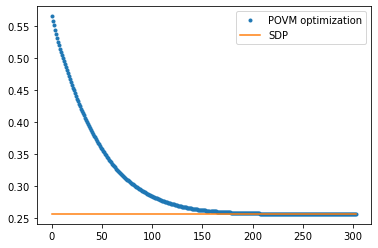

In [ ]:
cost_list = povm_classifier.cost_convg
plt.plot(range(len(cost_list)), cost_list, '.', label='POVM optimization')
plt.plot(range(len(cost_list)), [val]*len(cost_list), '-', label='SDP')
plt.legend()
plt.show()

#### Testing

In [ ]:
print(y_test, X_test)

In [ ]:
for i in range(len(y_test)):
    print(y_test[i], np.argmax(povm_classifier.predict(X_test[i])))

1 1
1 1
2 0
1 1
0 0
2 0
2 1
1 1
1 1
0 0
1 1
2 0
0 0
2 0
0 0
2 1
1 1
0 0
0 0
0 0
1 2
1 1
2 0
1 0
0 0
0 0
0 0
2 1
0 0
2 0


## 4. Simulation

### 4-1. Exponential + Affine Preprocessing + Amplitude Encoding

In [2]:
iris_data = load_iris()

X = iris_data.data
X = np.exp(X/2)
X = affine_preprocessing(X)
y = iris_data.target



X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=120/150,
                                                    stratify=y,
                                                    random_state=10)
print([np.count_nonzero(y_train == i) for i in range(3)])

[10, 10, 10]


In [3]:
num_state = len(X_train)
X_train = [X_train[i] / np.linalg.norm(X_train[i]) for i in range(num_state)]

In [4]:
num_povm = 3
wires = [0, 1, 2, 3]
clf = POVM_iris(num_povm, wires)

In [5]:
clf.fit(X_train, y_train)
# 4m 7.1s

Cost(init_params)    :  0.6439197
Cost after step   20 :  0.4857792
Cost after step   40 :  0.4164824
Cost after step   60 :  0.3738511
Cost after step   80 :  0.3562842
Cost after step  100 :  0.3530596
Cost after step  120 :  0.3515300
Cost after step  140 :  0.3503624
Cost after step  160 :  0.3495911
Cost after step  180 :  0.3491059
Cost after step  200 :  0.3488106
Cost after step  220 :  0.3486283
Cost after step  240 :  0.3485134
Cost after step  260 :  0.3484409
Cost after step  280 :  0.3483963
Cost after step  300 :  0.3483704
Cost after step  320 :  0.3483565
Cost after step  340 :  0.3483497


In [6]:
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)

print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))

outcome = clf.predict(X_test)
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: amplitude
Training size: 30 | Success: 24
Test size: 120 | Success: 98 | Ratio: 0.8166666666666667


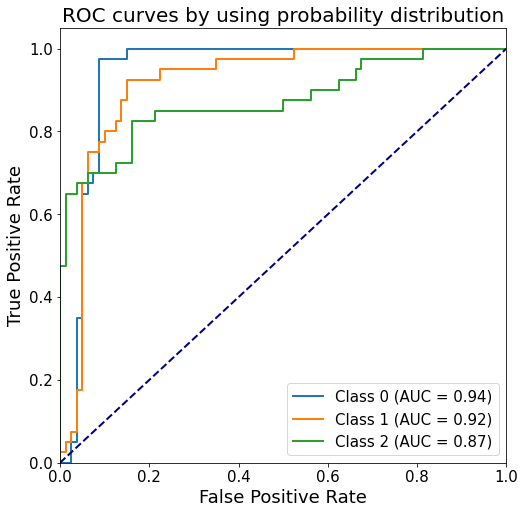

In [29]:
y_scores = clf.probs_predict[:,:3]
y_scores[:,[1, 2]] = y_scores[:,[2, 1]]
plot_ROC_curve(y_test, y_scores)

In [6]:
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)

print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))

outcome = clf.predict(X_test)
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: amplitude
Training size: 60 | Success: 49
Test size: 90 | Success: 73 | Ratio: 0.8111111111111111


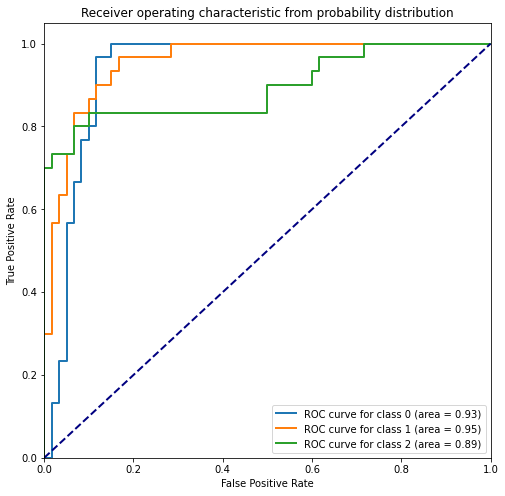

In [7]:
y_scores = clf.probs_predict[:,:3]
y_scores[:,[1, 2]] = y_scores[:,[2, 1]]
plot_ROC_curve(y_test, y_scores)

#### `random_state=35`

In [ ]:
# # of data 5
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: amplitude
Training size: 120 | Success: 98
Test size: 30 | Success: 27 | Ratio: 0.9


In [ ]:
# # of data 5
outcome = clf.predict(X_test)
print('Total:', len(y_test), 'Succuess:', np.count_nonzero(y_test == outcome))
print('Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Total: 75 Succuess: 65
Ratio: 0.8666666666666667


In [ ]:
# # of data 5
outcome = clf.predict(X_test)
print('Total:', len(y_test), 'Succuess:', np.count_nonzero(y_test == outcome))
print('Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Total: 90 Succuess: 77
Ratio: 0.8555555555555555


In [ ]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: amplitude
Training size: 45 | Success: 38
Test size: 105 | Success: 84 | Ratio: 0.8


In [ ]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: amplitude
Training size: 30 | Success: 25
Test size: 120 | Success: 99 | Ratio: 0.825


### 4-2. Quantum Feature Map

In [23]:
X, y = load_iris().data, load_iris().target
X = pos_affine_preprocessing(X) #, minmax='0-to-2pi')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=90/150,
                                                    stratify=y,
                                                    random_state=10) #35
print([np.count_nonzero(y_train == i) for i in range(3)])

[20, 20, 20]


In [24]:
num_povm = 3
wires = [0, 1, 2, 3]
clf = POVM_iris(num_povm, wires)

In [25]:
clf.fit(X_train, y_train, enc='qfeat', layer=2, feat_type='gaussian')
# 34m 13.9s

Cost(init_params)    :  0.6160057
Cost after step   20 :  0.5212512
Cost after step   40 :  0.4708147
Cost after step   60 :  0.4425390
Cost after step   80 :  0.4279960
Cost after step  100 :  0.4223411
Cost after step  120 :  0.4205681
Cost after step  140 :  0.4202158
Cost after step  160 :  0.4201806


In [6]:
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)

print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))

outcome = clf.predict(X_test)
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: gaussian
Training size: 30 | Success: 29
Test size: 120 | Success: 108 | Ratio: 0.9


In [26]:
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)

print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))

outcome = clf.predict(X_test)
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: gaussian
Training size: 60 | Success: 44
Test size: 90 | Success: 68 | Ratio: 0.7555555555555555


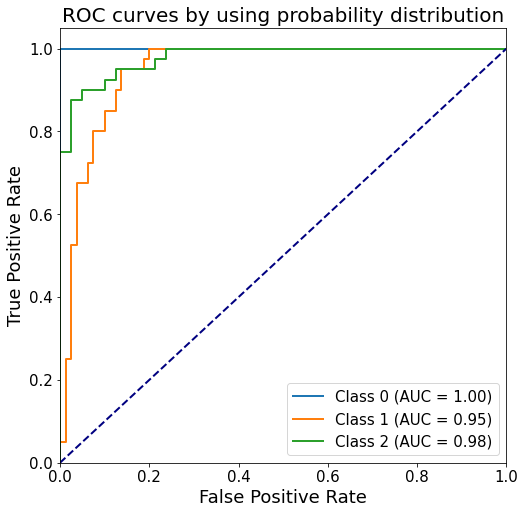

In [22]:
y_scores = clf.probs_predict[:,:3]
y_scores[:,[1, 2]] = y_scores[:,[2, 1]]
plot_ROC_curve(y_test, y_scores)

In [7]:
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)

print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))

outcome = clf.predict(X_test)
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: gaussian
Training size: 60 | Success: 57
Test size: 90 | Success: 84 | Ratio: 0.9333333333333333


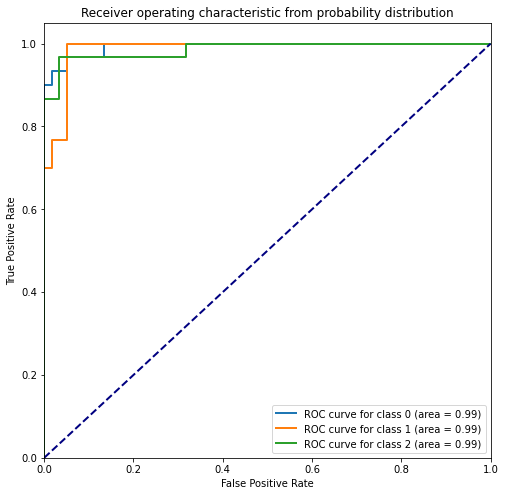

In [10]:
y_scores = clf.probs_predict[:,:3]
y_scores[:,[1, 2]] = y_scores[:,[2, 1]]
plot_ROC_curve(y_test, y_scores)

---

In [ ]:
# prototype
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: gaussian
Training size: 30 | Success: 27
Test size: 120 | Success: 102 | Ratio: 0.85


#### Three Layers

In [15]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 3 | feat_type: gaussian
Training size: 120 | Success: 106
Test size: 30 | Success: 26 | Ratio: 0.8666666666666667


In [29]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 3 | feat_type: binflipmult
Training size: 120 | Success: 91
Test size: 30 | Success: 21 | Ratio: 0.7


#### Two Layers

In [5]:
# random_state = 35
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: pidiffmult
Training size: 120 | Success: 63
Test size: 30 | Success: 14 | Ratio: 0.4666666666666667


In [26]:
# random_state = 3
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: invcoscos
Training size: 120 | Success: 115
Test size: 30 | Success: 24 | Ratio: 0.8


In [10]:
# random_state =5
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: gaussian
Training size: 120 | Success: 110
Test size: 30 | Success: 29 | Ratio: 0.9666666666666667


In [20]:
# random_state = 35
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: gaussian
Training size: 120 | Success: 114
Test size: 30 | Success: 25 | Ratio: 0.8333333333333334


In [24]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 2 | feat_type: binflipmult
Training size: 120 | Success: 95
Test size: 30 | Success: 18 | Ratio: 0.6


#### One Layer 

In [6]:
# random_state = 35
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: pidiffmult
Training size: 120 | Success: 80
Test size: 30 | Success: 13 | Ratio: 0.43333333333333335


In [50]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: coscos
Training size: 120 | Success: 100
Test size: 30 | Success: 26 | Ratio: 0.8666666666666667


In [45]:
# random_state = 5
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: invcoscos
Training size: 120 | Success: 108
Test size: 30 | Success: 26 | Ratio: 0.8666666666666667


In [40]:
# random_state = 5
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: gaussian
Training size: 120 | Success: 108
Test size: 30 | Success: 28 | Ratio: 0.9333333333333333


In [8]:
# Add last RX 
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: gaussian
Training size: 120 | Success: 109
Test size: 30 | Success: 26 | Ratio: 0.8666666666666667


In [35]:
# random_state = 5
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: binflipmult
Training size: 120 | Success: 105
Test size: 30 | Success: 25 | Ratio: 0.8333333333333334


In [ ]:
outcome = clf.predict(X_test)
print('Quantum Encoding Type:', clf.enc_type)
if clf.enc_type == 'qfeat':
    print('Layer:', clf.layer, '| feat_type:', clf.feat_type)
print('Training size:', len(y_train), 
        '| Success:', np.count_nonzero(y_train == clf.predict(X_train)))
print('Test size:', len(y_test), 
        '| Success:', np.count_nonzero(y_test == outcome), 
        '| Ratio:', np.count_nonzero(y_test == outcome)/len(y_test))

Quantum Encoding Type: qfeat
Layer: 1 | feat_type: mult
Training size: 120 | Success: 88
Test size: 30 | Success: 19 | Ratio: 0.6333333333333333


---
---
---
---
# TESTS

In [14]:
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
sy = np.array([[0,-1j],[1j,0]])
sx = np.array([[0,1],[1,0]])
sz = np.array([[1,0],[0,-1]])

In [16]:
IY = np.kron(np.eye(2), sy)
IY

tensor([[0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
        [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j]], requires_grad=True)

In [17]:
np.dot(np.dot(cnot, IY), cnot)

tensor([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
        [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]], requires_grad=True)

In [20]:
YY = np.kron(sy, sy)
expm(1j*YY)

array([[ 1.54308063+0.j,  0.        +0.j,  0.        +0.j,
        -1.17520119+0.j],
       [ 0.        +0.j,  1.54308063+0.j,  1.17520119+0.j,
         0.        +0.j],
       [ 0.        +0.j,  1.17520119+0.j,  1.54308063+0.j,
         0.        +0.j],
       [-1.17520119+0.j,  0.        +0.j,  0.        +0.j,
         1.54308063+0.j]])